In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

dataset = pd.read_csv('minihomeprices.csv')

In [2]:
dataset.head(5)

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [3]:
dataset.columns

Index(['area', 'bedrooms', 'age', 'price'], dtype='object')

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   area      6 non-null      int64  
 1   bedrooms  5 non-null      float64
 2   age       6 non-null      int64  
 3   price     6 non-null      int64  
dtypes: float64(1), int64(3)
memory usage: 324.0 bytes


In [5]:
dataset.isnull().sum()

area        0
bedrooms    1
age         0
price       0
dtype: int64

In [6]:
dataset.fillna(dataset.mean(), inplace=True)

In [7]:
dataset.isnull().sum()

area        0
bedrooms    0
age         0
price       0
dtype: int64

Till Now i have cleaned the data and now i am performing regression 

In [9]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer


In [11]:
x = dataset[['age','area','bedrooms']]
y = dataset['price']

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [13]:
model = LinearRegression()

In [14]:
model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [22]:
y_pred = model.predict(x_test)
print("Predicted Prices:", y_pred/10000)
print("R² Score:", r2_score(y_test, y_pred))

Predicted Prices: [48.50289017 58.23554913]
R² Score: -39.1996150147901


In [17]:
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Intercept: 76719.65317920526
Coefficients: [-1791.90751445   127.89017341 37210.98265896]


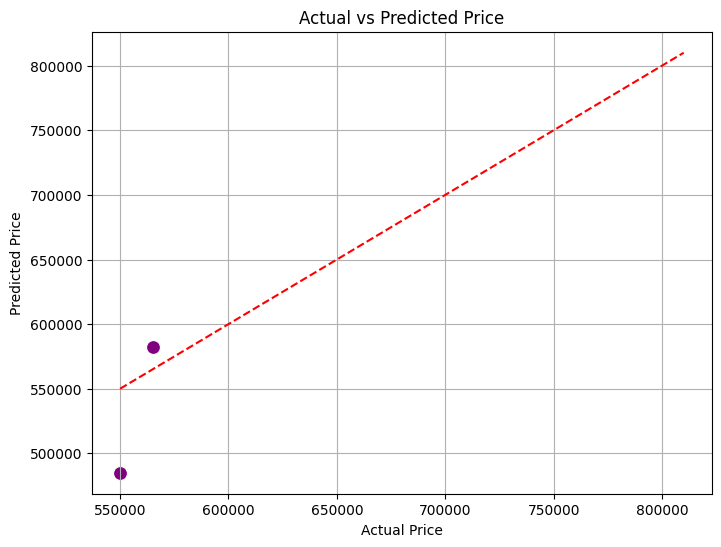

In [20]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='purple', s=100)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # reference line
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.grid(True)
plt.show()


In [24]:
score = model.score( x, y )

print(score * 100)

92.40348820409203
